# Telecom churn prediction

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Loading the Dataset

In [ ]:
data = pd.read_csv(r'Telecom-Customer-Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#customerID  string
#Customer ID

#gender string
#Customer gender (female, male)

#SeniorCitizen bool
#Whether the customer is a senior citizen or not (1, 0)

#Partner bool
#Whether the customer has a partner or not (Yes, No)

#Dependents bool
#Whether the customer has dependents or not (Yes, No)

#tenure int64
#Number of months the customer has stayed with the company

#PhoneService bool
#Whether the customer has a phone service or not (Yes, No)

#MultipleLines bool
#Whether the customer has multiple lines or not (Yes, No, No phone service)

#InternetService	string
#Customer’s internet service provider (DSL, Fiber optic, No)

#OnlineSecurity bool
#Whether the customer has online security or not (Yes, No, No internet service)

#OnlineBackup  bool
#Whether the customer has online backup or not (Yes, No, No internet service)

#DeviceProtection bool
#Whether the customer has device protection or not (Yes, No, No internet service)

#TechSupport bool
#Whether the customer has tech support or not (Yes, No, No internet service)

#StreamingTV bool
#Whether the customer has streaming TV or not (Yes, No, No internet service)

#StreamingMovies bool
#Whether the customer has streaming movies or not (Yes, No, No internet service)

#Contract string
#The contract term of the customer (Month-to-month, One year, Two year)

#PaperlessBilling bool
#Whether the customer has paperless billing or not (Yes, No)

#PaymentMethod string
#The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

#MonthlyCharges float64
#The amount charged to the customer monthly

#TotalCharges float64
#The total amount charged to the customer

#Churn bool
#Whether the customer churned or not (Yes or No)

#Reference
#https://github.com/koushik2001/Churn-Prediction-of-Telecom-Customers-using-Machine-Learning/blob/main/Customer-Churn-Prediction.ipynb

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Checking for Duplicates - No duplicate rows

In [ ]:
duplicate = data[data.duplicated()]
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Dropping Unwanted Columns - Customer ID

In [ ]:
# drop customerID column
data = data.drop('customerID',axis=1)

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Checking for Null values

In [ ]:
# Checking for null values in each columns

null_values = data.isna().sum().sort_values(ascending=False)
null_values = pd.DataFrame(null_values).reset_index()
null_values.columns = ['Column Name', 'No. of null values']
print(null_values)

         Column Name  No. of null values
0             gender                   0
1      SeniorCitizen                   0
2       TotalCharges                   0
3     MonthlyCharges                   0
4      PaymentMethod                   0
5   PaperlessBilling                   0
6           Contract                   0
7    StreamingMovies                   0
8        StreamingTV                   0
9        TechSupport                   0
10  DeviceProtection                   0
11      OnlineBackup                   0
12    OnlineSecurity                   0
13   InternetService                   0
14     MultipleLines                   0
15      PhoneService                   0
16            tenure                   0
17        Dependents                   0
18           Partner                   0
19             Churn                   0


### Checking for Empty Values

In [ ]:
columns = list(data)
empty_values = []

for i in columns:
  x = len(data[data[i]==' '])
  empty_values.append((i,x))

empty_values = pd.DataFrame(empty_values)
empty_values.columns = ['Column Name', 'No. of empty values']
print(empty_values)

         Column Name  No. of empty values
0             gender                    0
1      SeniorCitizen                    0
2            Partner                    0
3         Dependents                    0
4             tenure                    0
5       PhoneService                    0
6      MultipleLines                    0
7    InternetService                    0
8     OnlineSecurity                    0
9       OnlineBackup                    0
10  DeviceProtection                    0
11       TechSupport                    0
12       StreamingTV                    0
13   StreamingMovies                    0
14          Contract                    0
15  PaperlessBilling                    0
16     PaymentMethod                    0
17    MonthlyCharges                    0
18      TotalCharges                   11
19             Churn                    0


In [ ]:
# Handling empty values in Total Charges

for i in range(len(data)):
    if(data['TotalCharges'].loc[i] == ' '):
      data['TotalCharges'].loc[i] = 0

### Set Precision to Numerical Data

Changing the data type of total values as it was a object type to float32.
Setting the data types as float32 or float64 sets the precision.

In [ ]:
# numeric columns
print("Numeric Columns:\n")
for col in data.columns:
    if(data[col].dtype=="int64" or data[col].dtype=="float64" or data[col].dtype=="float32"):
        print(col)

Numeric Columns:

SeniorCitizen
tenure
MonthlyCharges


In [ ]:
# categorical columns

print("Categorical Columns:\n")
for col in data.columns:
    if(data[col].dtype=="object"):
        print(col)

Categorical Columns:

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
Churn


In [ ]:
# TotalCharges is in object datatype convert it to float type

data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], downcast="float")

In [ ]:
# numeric columns
print("Numeric Columns:\n")
for col in data.columns:
    if(data[col].dtype=="int64" or data[col].dtype=="float64" or data[col].dtype=="float32"):
        print(col)

Numeric Columns:

SeniorCitizen
tenure
MonthlyCharges
TotalCharges


In [ ]:
data["TotalCharges"].dtype

dtype('float32')

In [ ]:
data['SeniorCitizen'] = data['SeniorCitizen'].replace({0:'No',1:'Yes'})

In [ ]:
data["SeniorCitizen"].dtype

dtype('O')

## Exploratory Data Analysis

### General Characteristics of Data

In [ ]:
#Shape of Dataframe
print("Dataframe shape: ",data.shape)

Dataframe shape:  (7043, 20)


In [ ]:
numerics = ['float64','float32','int64']
numeric_ds = data.select_dtypes(include=numerics)
objects_ds = data.select_dtypes(exclude=numerics)

In [ ]:
print(numeric_ds.columns)
print(objects_ds.columns)

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


**Calculating Measures of Centre**

In [ ]:
#Showing Measures of Centre for numeric data
centre_stats = numeric_ds.describe().loc[['mean']].T
centre_stats['median'] = numeric_ds.median()
# Print the formatted DataFrame
print(centre_stats)

                       mean       median
tenure            32.371149    29.000000
MonthlyCharges    64.761692    70.350000
TotalCharges    2279.734375  1394.550049


**Calculating Measures of Spread**

In [ ]:
spread_stats = numeric_ds.describe().loc[['std','25%','75%']].T
spread_stats['IQR'] = spread_stats['75%'] - spread_stats['25%']
spread_stats['Variance'] = spread_stats['std'] ** 2
#Showing Standard Deviation, Interquartile range and Variance
spread_stats = spread_stats[['std', 'IQR', 'Variance']]
print(spread_stats)

                        std          IQR      Variance
tenure            24.559481    46.000000  6.031681e+02
MonthlyCharges    30.090047    54.350000  9.054109e+02
TotalCharges    2266.794434  3388.049988  5.138357e+06


In [ ]:
objects_ds.describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


## Graphical Analysis

### Graphical Analysis on Objective Data

### Co-Relation matrix between Features/Columns

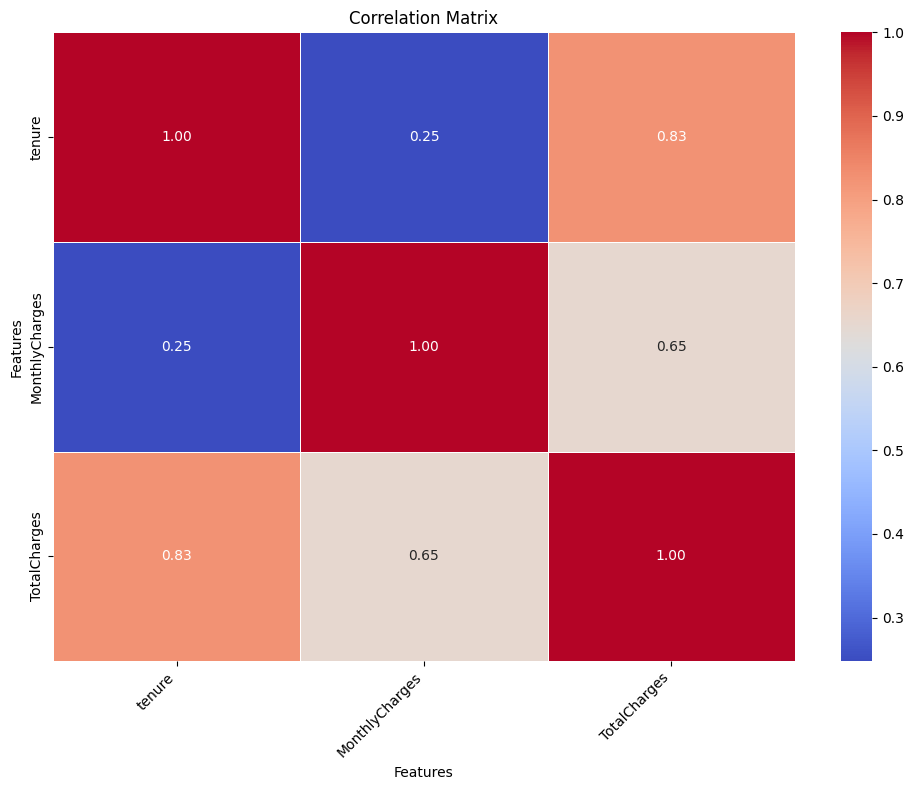

In [ ]:
correlation_matrix = data.corr()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap with customized color map and annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)

# Set the axis labels and title
ax.set_xlabel("Features")
ax.set_ylabel("Features")
ax.set_title("Correlation Matrix")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the plot layout to prevent overlap of tick labels
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
churn     = data[data["Churn"] == "Yes"]
not_churn = data[data["Churn"] == "No"]

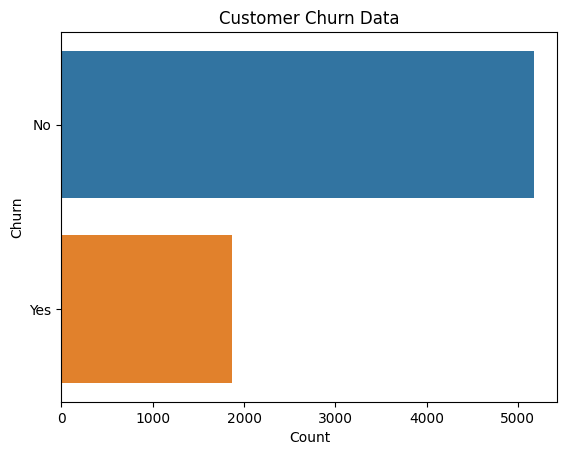

In [ ]:
#Plotting number of customers with churn as basis
data_churn = data['Churn'].value_counts().reset_index()

fig, ax = plt.subplots()
sns.barplot(x='Churn', y='index', data=data_churn)

ax.set_title('Customer Churn Data')
ax.set_xlabel('Count')
ax.set_ylabel('Churn')

plt.show()

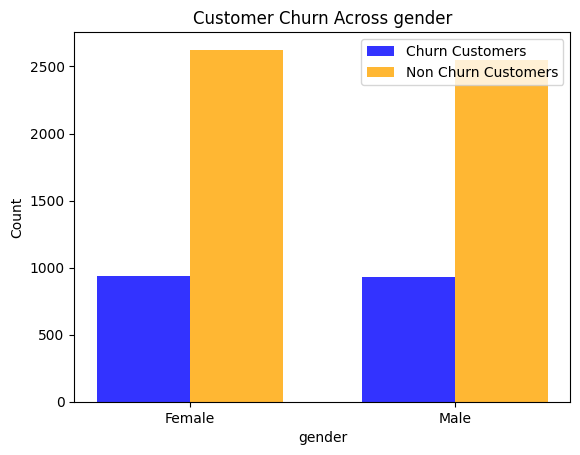

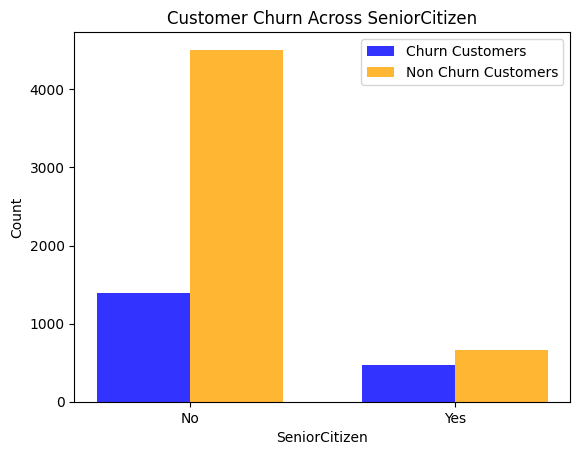

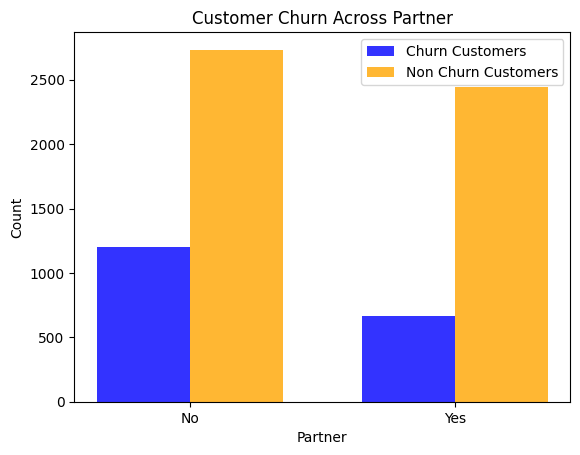

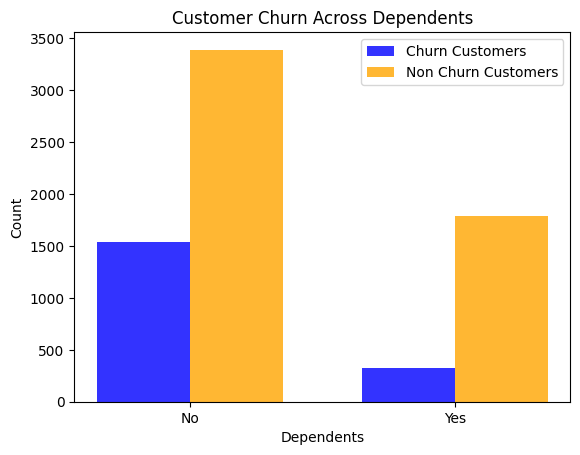

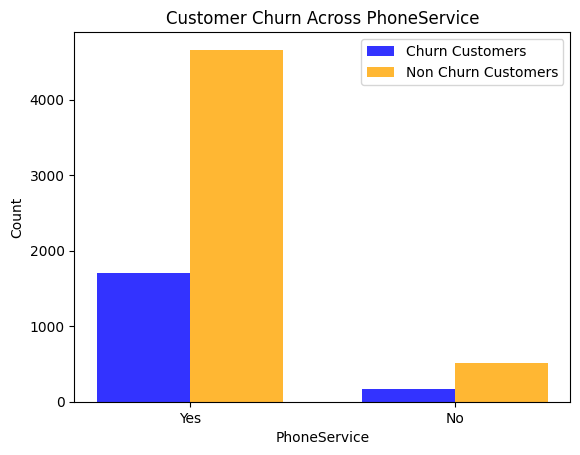

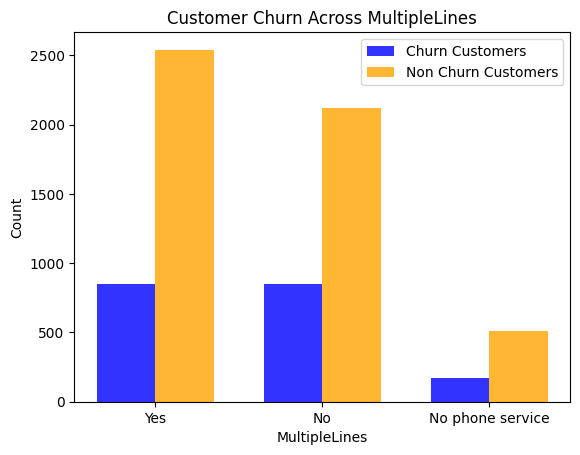

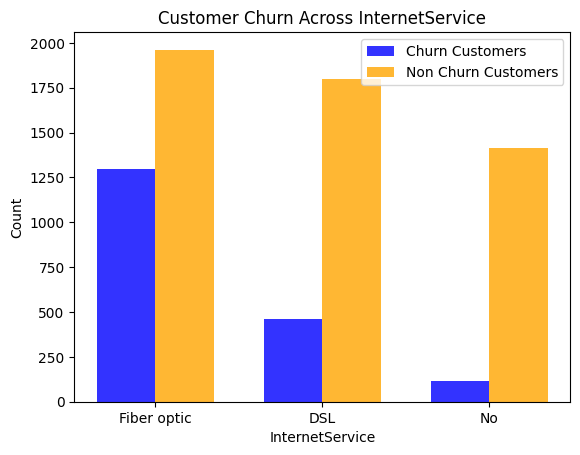

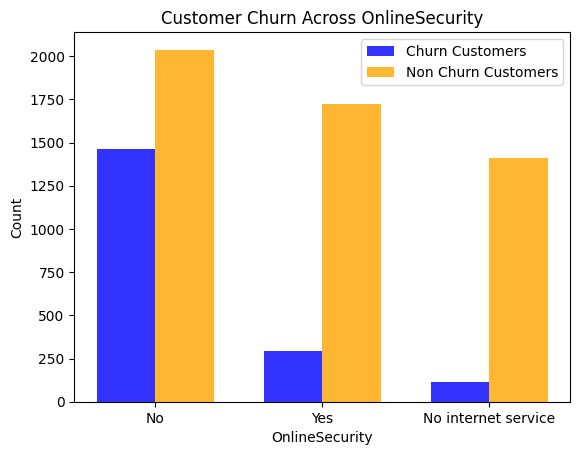

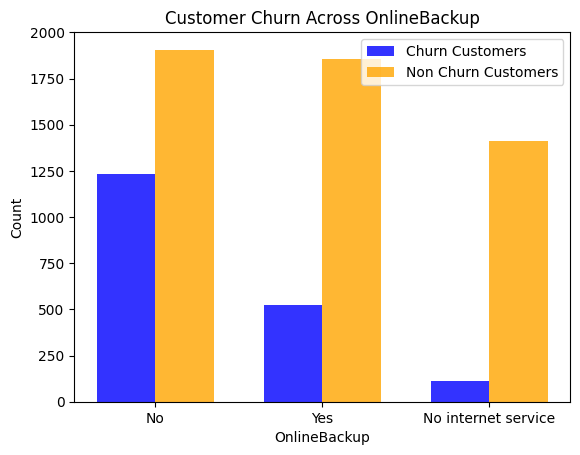

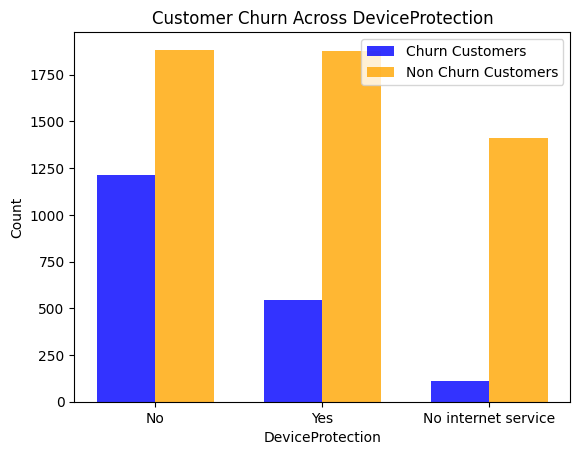

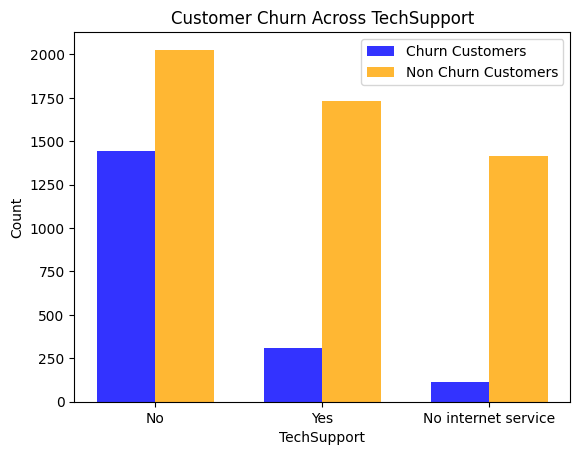

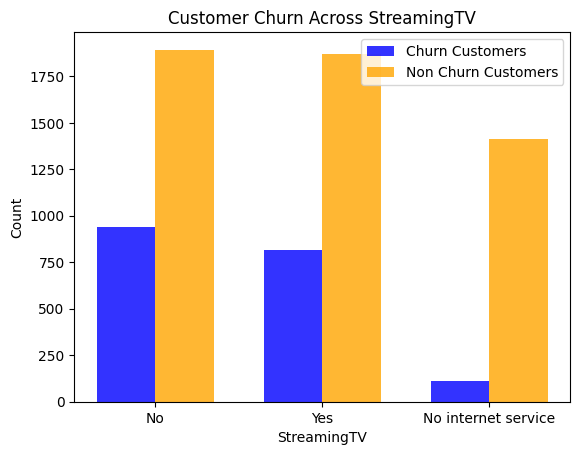

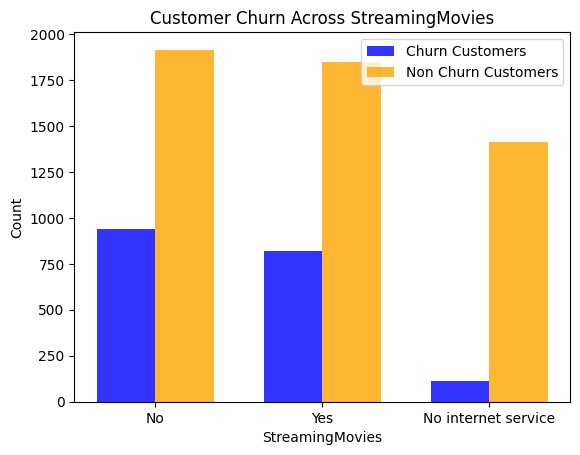

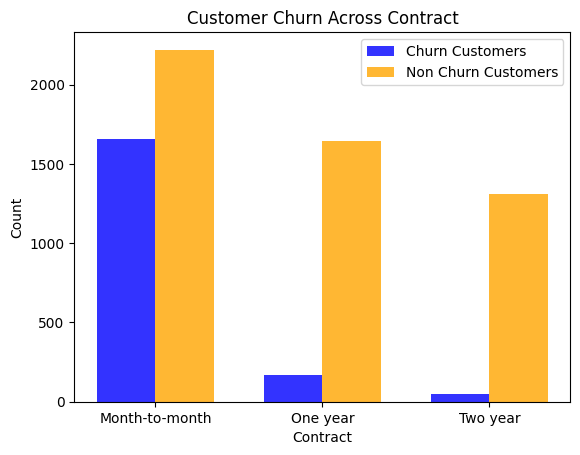

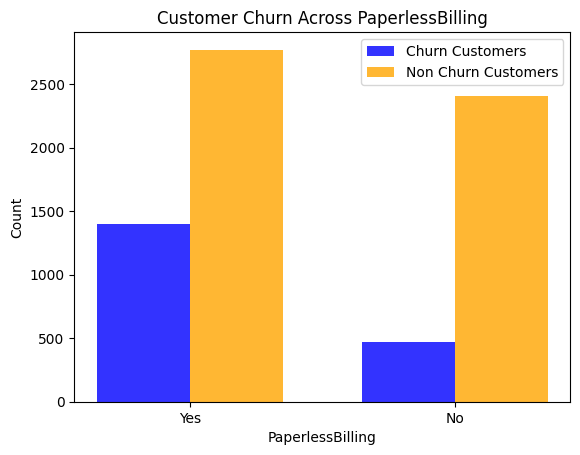

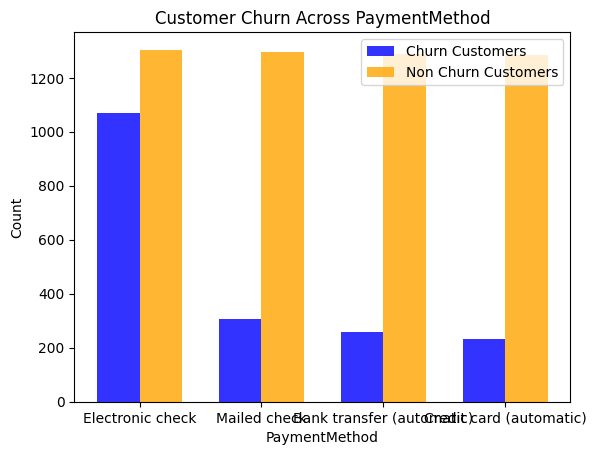

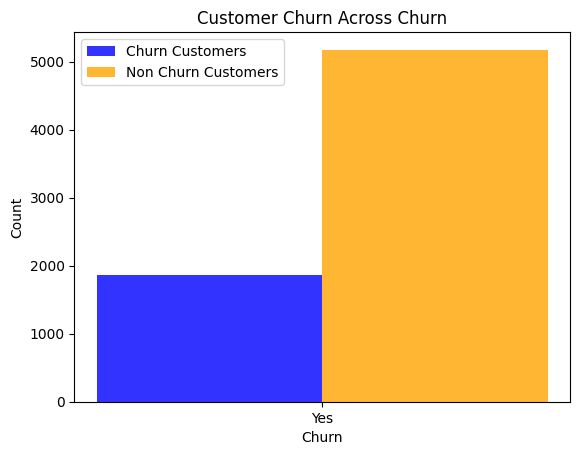

In [ ]:
for i, column in enumerate(objects_ds.columns):
    if columns=='Churn':
      continue
    data_ch = churn[column].value_counts().reset_index()
    data_ch.columns = [column, 'Count']
    data_nch = not_churn[column].value_counts().reset_index()
    data_nch.columns = [column, 'Count']

    bar_width = 0.35
    index = np.arange(len(data_ch[column]))

    fig, ax = plt.subplots()
    ax.bar(index, data_ch['Count'], bar_width, label='Churn Customers', color='blue', alpha=0.8)
    ax.bar(index + bar_width, data_nch['Count'], bar_width, label='Non Churn Customers', color='orange', alpha=0.8)

    ax.set_title("Customer Churn Across " + column)
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(data_ch[column])
    ax.legend()

    plt.show()


From the above graphs we can say:

1. Gender is not an indicative of churn.
2. Customers with no partners are more likely to be churned
3. Customer with no dependents are more likely to be churned
4. Phone service does not tell much about churn rate
5. By comparing having multiples and no multiplelines customers with no multiplelines are less likely to be churned
6. Customers with no internet service are less likely to be churned
7. Customers with fiber optic service is more likely to be churned
8. Customers with no online security are more likely to churn
9. Customers having no online backup are more likely to churn
10. Customers having no Device Protection are more likely to churn
11. Customers having no Tech Support are more likely to churn
12. Nothing can be infered from StreamingTV and Streaming Movies
13. Customers having month-to-month contract are more likely to churn and having one year or two year are less likely to churn
14. PaperlessBilling doesnt much convey about churn rate
15. Payment method of electronic check is having most churn rate
16. Even though there are less senior citizens their churn rate is more than non-senior citizens

Finally No tech support, online backup, online security, partner, dependents and device support are more likely to churn




### Graphical Analysis On Numeric Data

1. Histogram plot
2. Box Plot
3. Density Plot

In [ ]:
num_numerical_cols = len(numeric_ds.columns)

# Calculate the number of subplot rows and columns
nrows = (num_numerical_cols - 1) // 2 + 1
ncols = 2

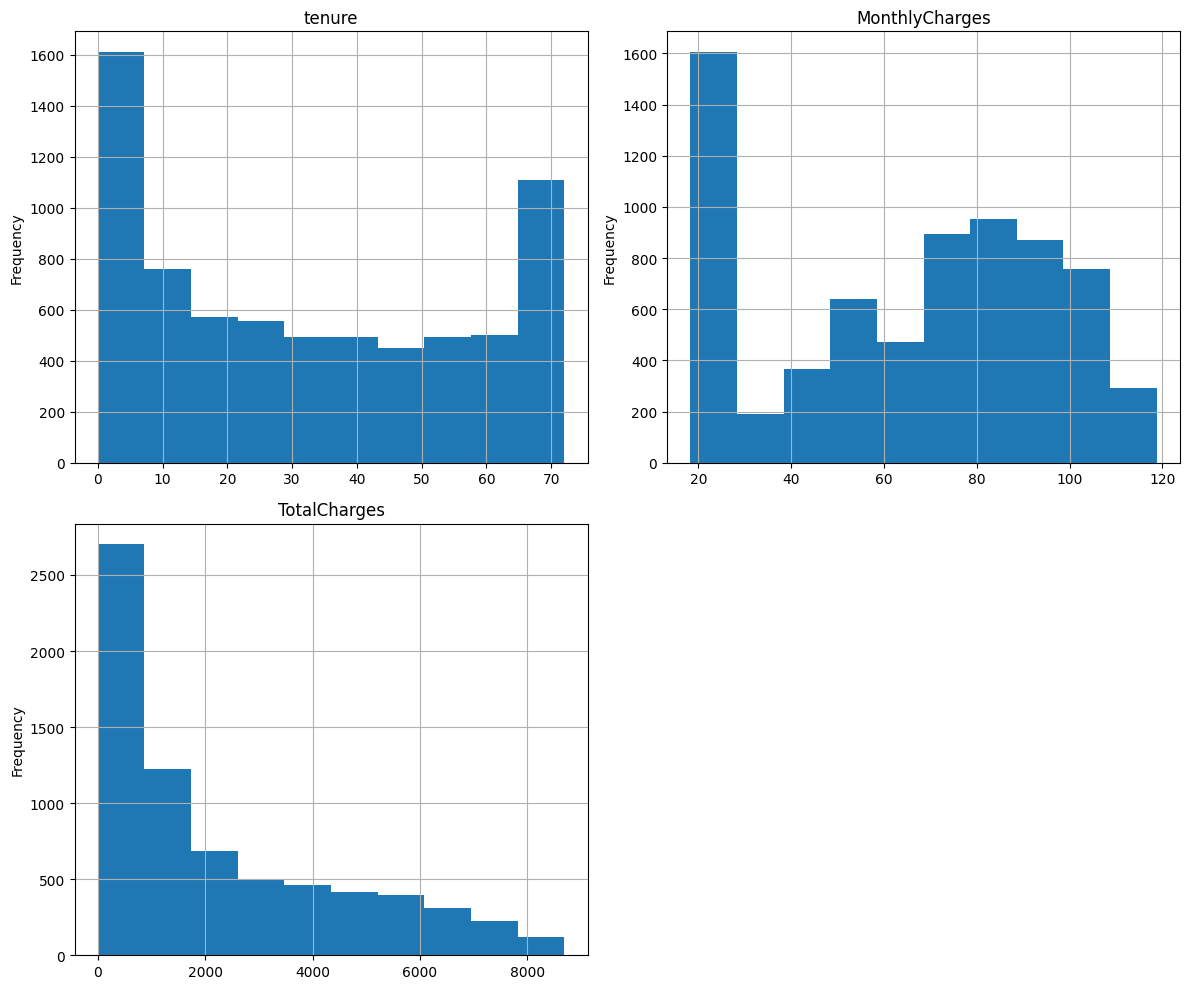

In [ ]:
# Create subplots for histograms
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))
axes = axes.flatten()

# Plot histograms
for i, column in enumerate(numeric_ds.columns):
    ax = axes[i]
    numeric_ds[column].hist(ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

# Hide empty subplots
if num_numerical_cols < len(axes):
    for j in range(num_numerical_cols, len(axes)):
        fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

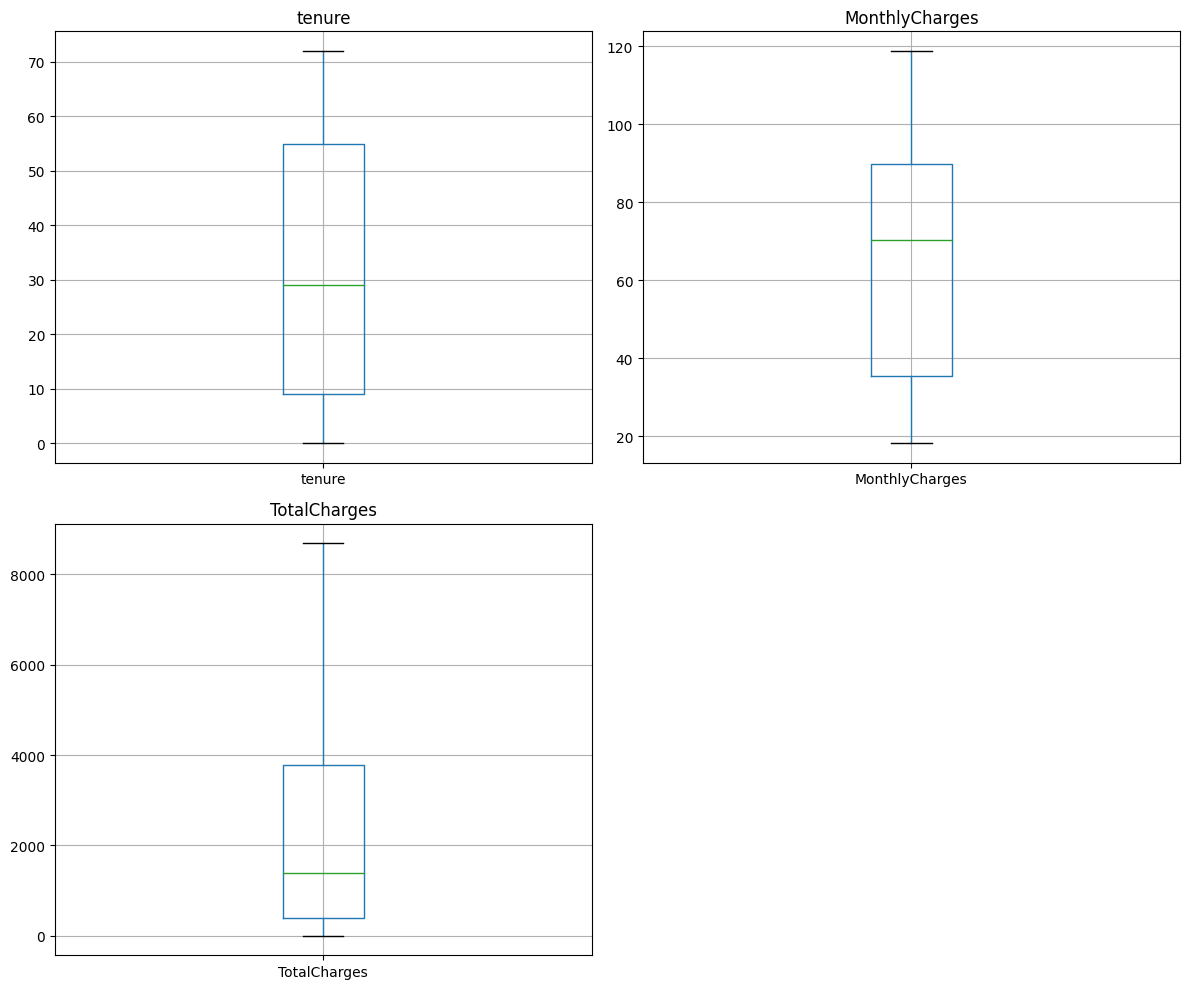

In [ ]:
# Create subplots for box plots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))
axes = axes.flatten()

# Plot box plots
for i, column in enumerate(numeric_ds.columns):
    ax = axes[i]
    numeric_ds.boxplot(column=column, ax=ax)
    ax.set_title(column)

# Hide empty subplots
if num_numerical_cols < len(axes):
    for j in range(num_numerical_cols, len(axes)):
        fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

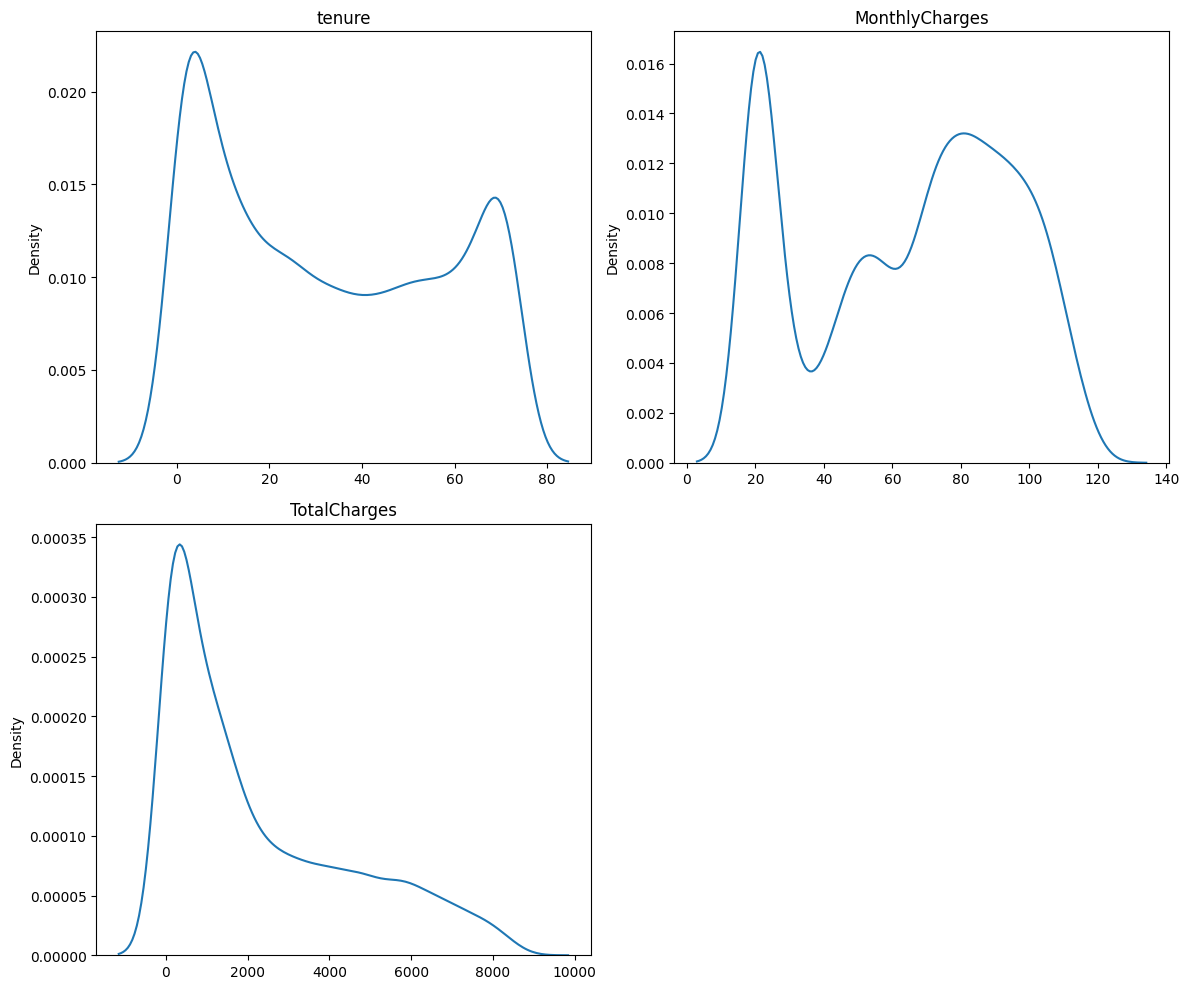

In [ ]:
# Create subplots for density plots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))
axes = axes.flatten()

# Plot density plots
for i, column in enumerate(numeric_ds.columns):
    ax = axes[i]
    sns.kdeplot(data=data, x=column, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('Density')

# Hide empty subplots
if num_numerical_cols < len(axes):
    for j in range(num_numerical_cols, len(axes)):
        fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### Violin plots

In [ ]:
def violin_plots(col1, col2):
    plt.figure(figsize=(10,6))

    # Violin plot
    sns.violinplot(x=data[col1],
                   y=data[col2],
                   hue=data['Churn'],
                   split=True,
                   palette={"Yes": "blue", "No": "orange"},
                   inner=None)

    plt.title('Violin Plots')
    plt.show()


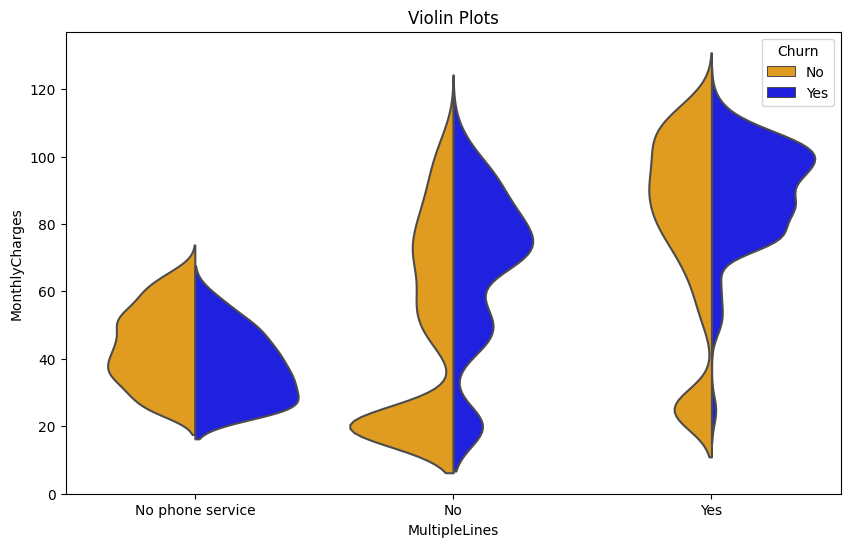

In [ ]:
violin_plots('MultipleLines','MonthlyCharges')

 We can see customers with no multiplelines and paying less monthly charges have less churn probability

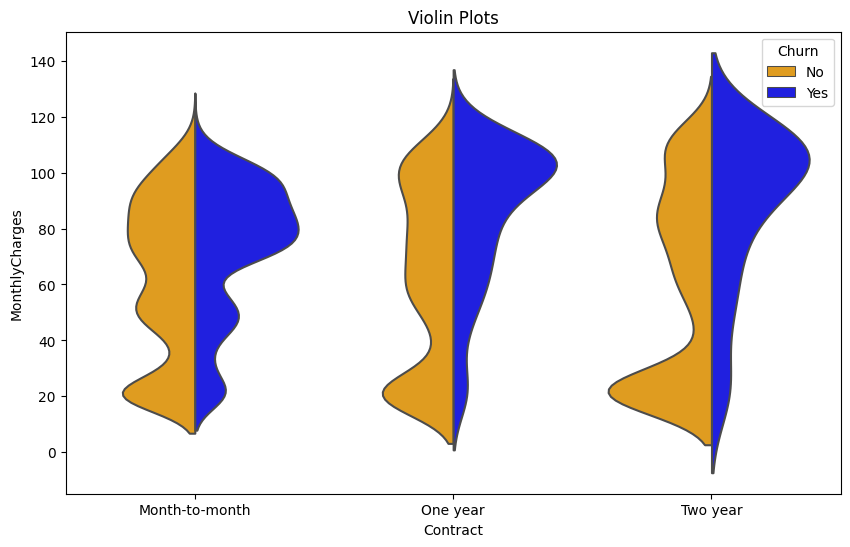

In [ ]:
violin_plots('Contract','MonthlyCharges')

Here both Two year and One Year Contract have Same trend but in all the three customers paying high monthly charges are most likely to churn

### Scatter Plots

In [ ]:
df_sub = data[['tenure','MonthlyCharges','TotalCharges','Churn']]

In [ ]:
def scatter_plot(df, x_column, y_column, color_column):
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, x=x_column, y=y_column, hue=color_column, ax=ax)

    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.set_title("Scatter Plot")
    ax.legend()

    plt.show()

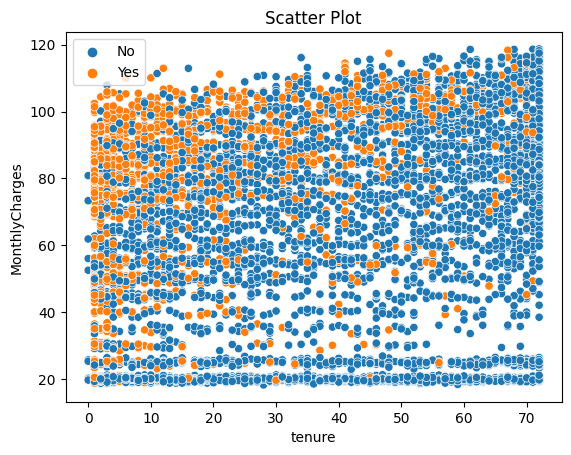

In [ ]:
scatter_plot(df_sub, "tenure", "MonthlyCharges", "Churn")

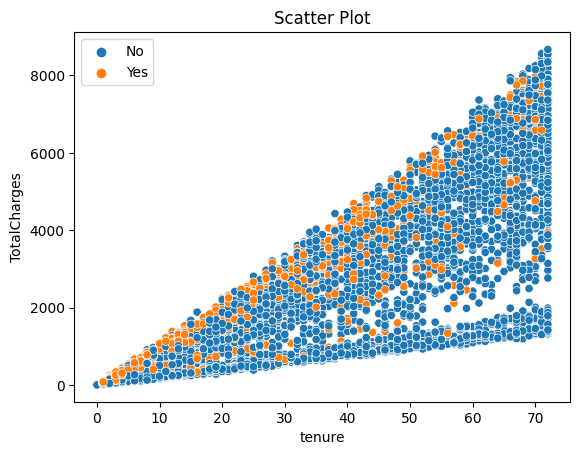

In [ ]:
scatter_plot(df_sub, "tenure", "TotalCharges", "Churn")

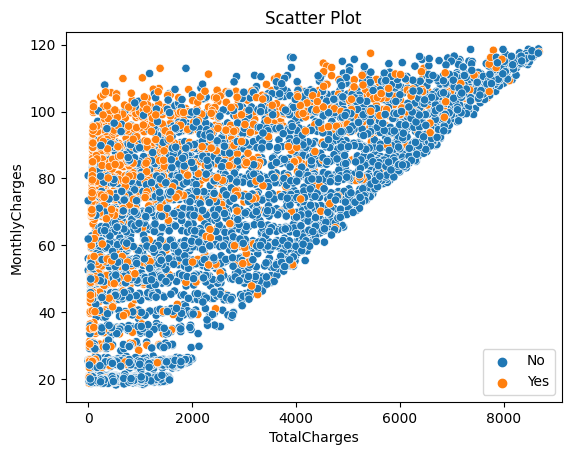

In [ ]:
scatter_plot(df_sub, "TotalCharges", "MonthlyCharges","Churn")

### Replacing categorical data with 0's and 1's

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


In [ ]:
#Gender column
data['gender'] = data['gender'].replace({'Female':0,'Male':1})

In [ ]:
#Senior Citizen column
data['SeniorCitizen'] = data['SeniorCitizen'].replace({'No':0,'Yes':1})

In [ ]:
#Partner columns
data['Partner'] = data['Partner'].replace({'Yes':1,'No':0})

In [ ]:
#Dependents columns
data['Dependents'] = data['Dependents'].replace({'Yes':1,'No':0})

In [ ]:
#Phone service column
data['PhoneService'] = data['PhoneService'].replace({'Yes':1,'No':0})

In [ ]:
#Paperless billing column
data['PaperlessBilling'] = data['PaperlessBilling'].replace({'Yes':1,'No':0})

In [ ]:
#Churn column
data['Churn'] = data['Churn'].replace({'Yes':1,'No':0})

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.850000,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.500000,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.150002,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.750000,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.649994,1


## Feature Engineering

### Creating dummy variables for categorical columns

In [ ]:
categorical_features = ['PaymentMethod','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract']

for feature in categorical_features:
    one_hot = pd.get_dummies(data[feature], prefix=feature, drop_first=False)
    data = data.drop(feature, axis=1)
    data = pd.concat([data, one_hot], axis=1)

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,1,29.85,29.850000,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.500000,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,2,1,1,53.85,108.150002,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.750000,0,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,151.649994,1,...,0,1,0,0,1,0,0,1,0,0


### Correlation of Churn attribute with others

In [ ]:
churn_correlation = data.corr()['Churn'].sort_values(ascending=False)
churn_correlation_df = pd.DataFrame(churn_correlation).reset_index()
churn_correlation_df.columns = ['Feature', 'Correlation_with_Churn']
churn_correlation_df


,Feature,Correlation_with_Churn
0,Churn,1.000000
1,Contract_Month-to-month,0.405103
2,OnlineSecurity_No,0.342637
3,TechSupport_No,0.337281
4,InternetService_Fiber optic,0.308020
5,PaymentMethod_Electronic check,0.301919
6,OnlineBackup_No,0.268005
7,DeviceProtection_No,0.252481
8,MonthlyCharges,0.193356
9,PaperlessBilling,0.191825


<Axes: >

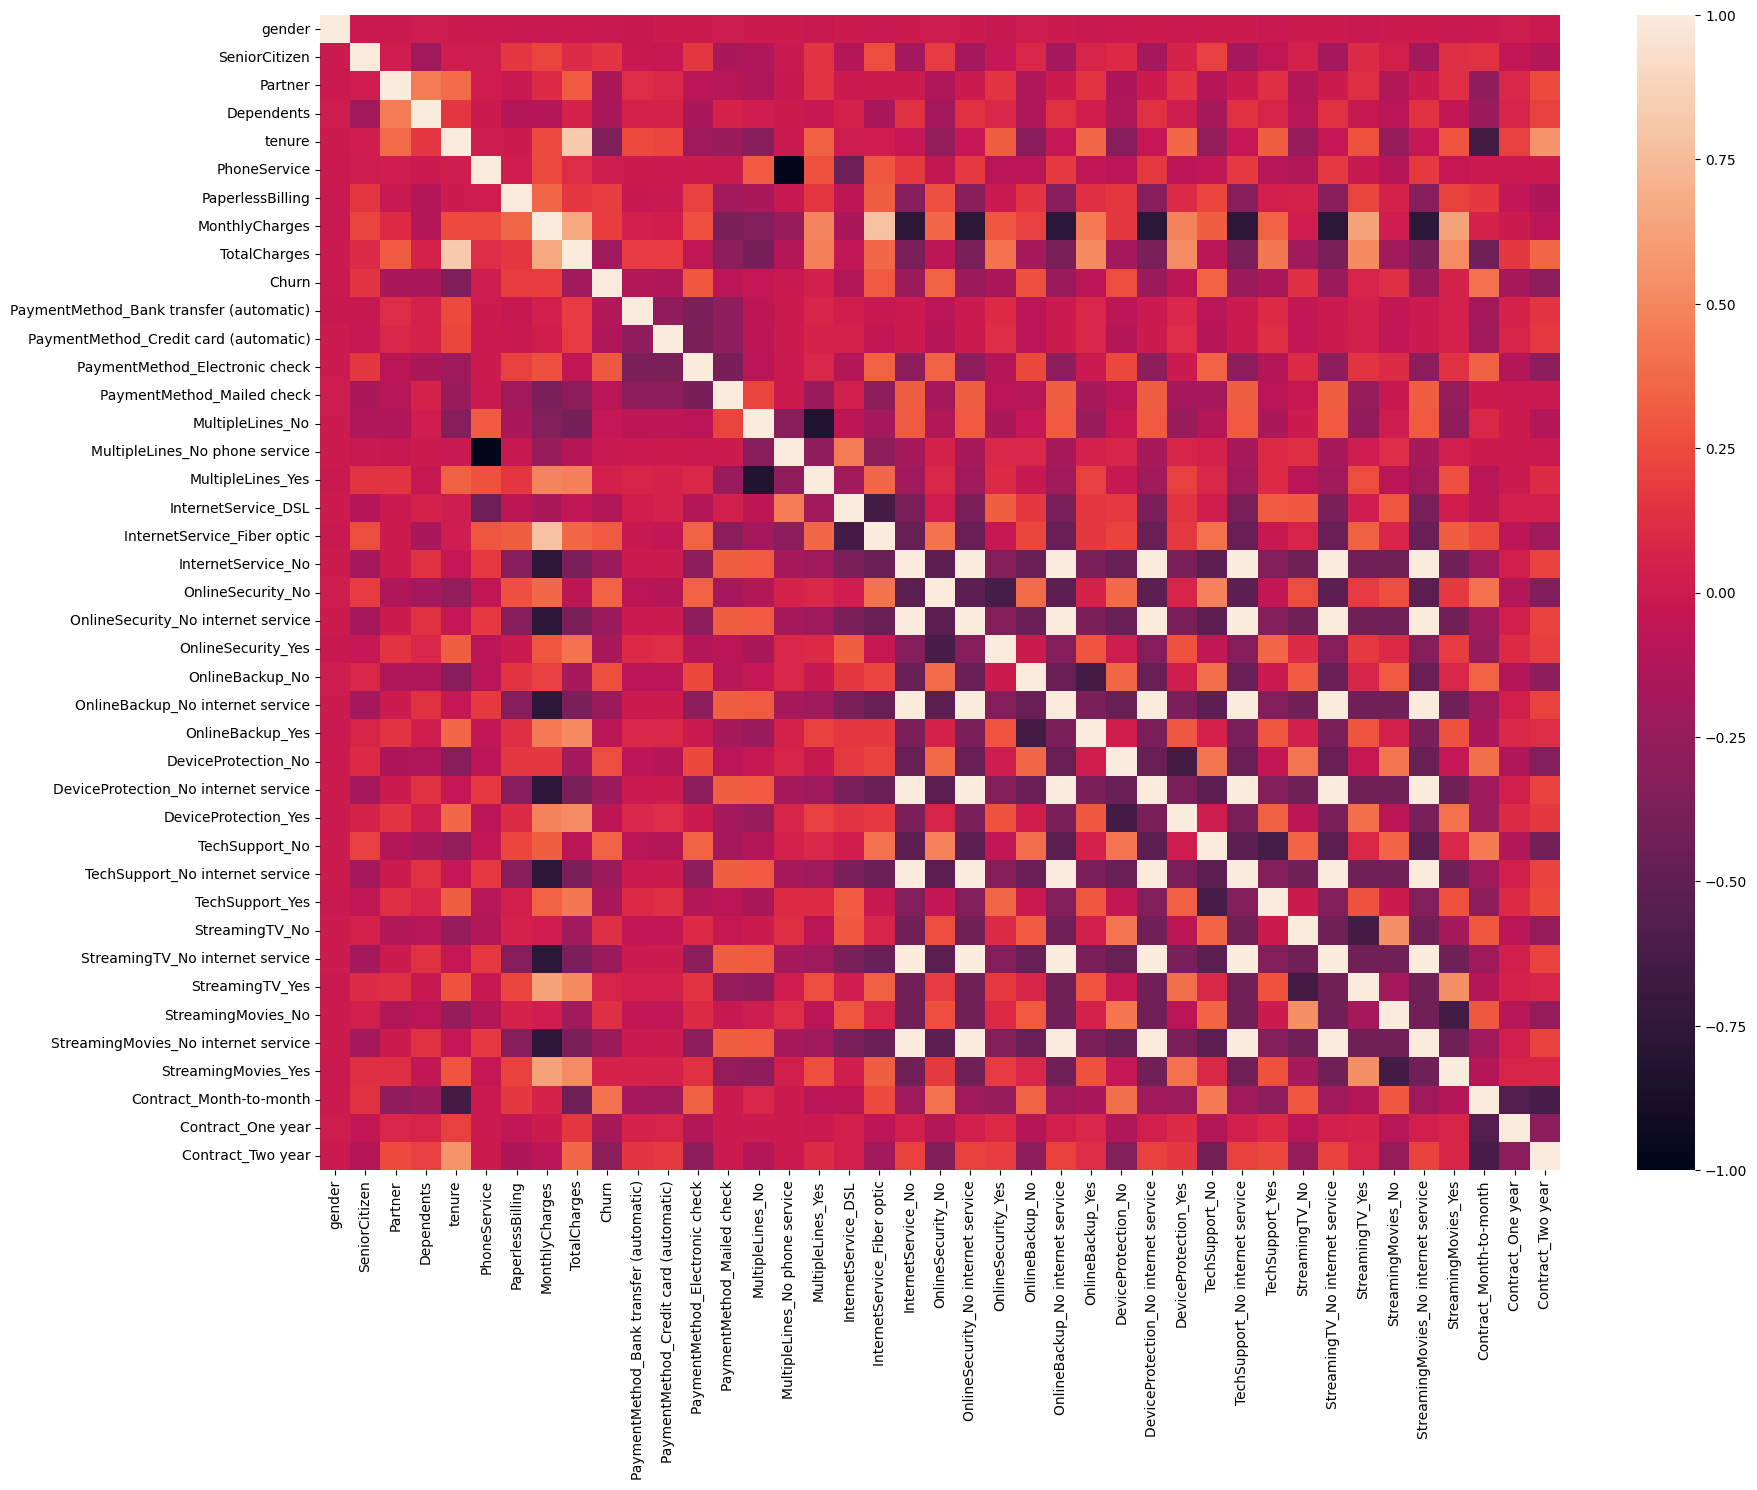

In [ ]:
corr=data.corr().iloc[:,:]
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=False)

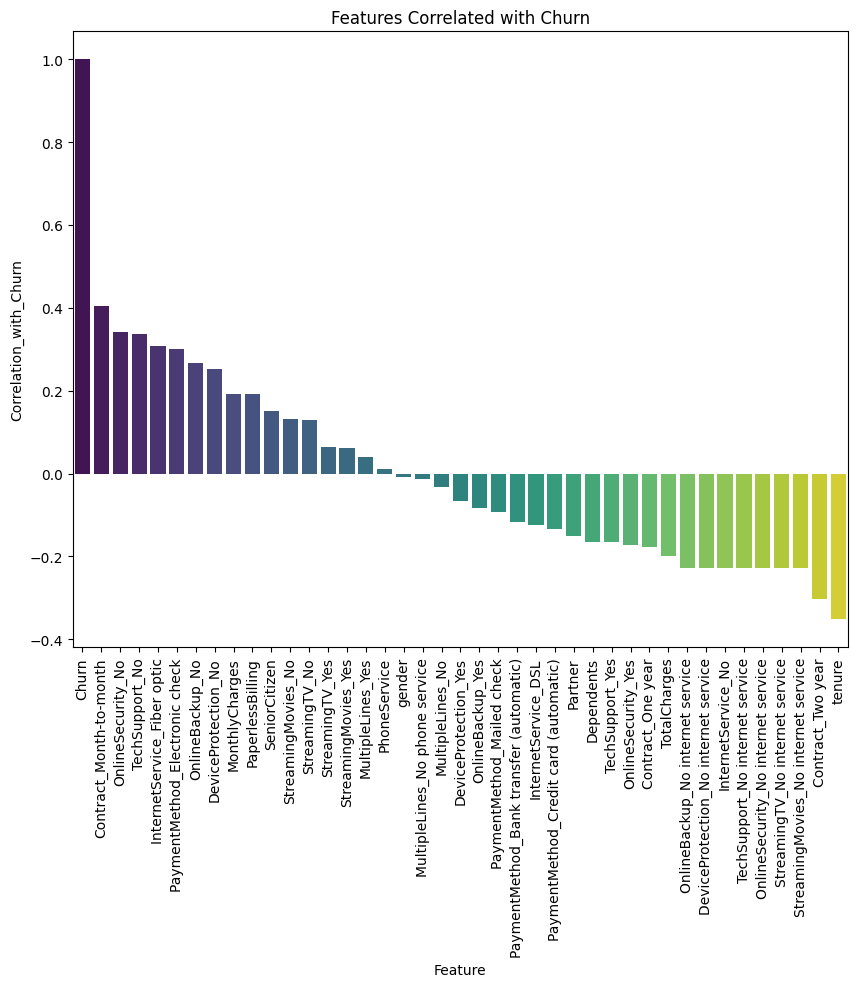

In [ ]:
top_corr = churn_correlation_df
plt.figure(figsize=(10, 8))

# Generate a bar plot
sns.barplot(data=top_corr, x='Feature', y='Correlation_with_Churn', palette='viridis')
plt.title('Features Correlated with Churn')
plt.xticks(rotation=90)
plt.show()

Total Charges is highly correlated with Monthly charges and Tenure
<br>
No_internet service is highly correlated with all streaming and support without internet service
<br>
So the redundant attributes are Total Charges and No_Internet service

#### Removing Redundant Attributes

In [ ]:
X = data.drop(['Churn','InternetService_No','TotalCharges'],axis=1)

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,1,29.85,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,0,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,2,1,1,53.85,0,0,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1,0,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,0,0,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
y = data['Churn']

In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
model_lr = lr.fit(X_train,y_train)
pred_lr = model_lr.predict(X_test)
acc_score = accuracy_score(y_test,pred_lr)
print(acc_score*100)

81.2588736393753


In [ ]:
len(X_train.columns)

38

#### Now our model consists of 38 features. To consider important features for our model building we use two methods
#### 1. Feature importance using Random Forest Classifier
#### 2. Recursive Feature Elimination using Logistic Regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
model_rf = rf.fit(X_train,y_train)

In [ ]:
columns = X_train.columns

In [ ]:
feature_list = list(zip(list(rf.feature_importances_), list(columns)))

In [ ]:
sorted(feature_list,reverse=True)

[(0.21168589355821246, 'tenure'),
 (0.19736360328356234, 'MonthlyCharges'),
 (0.04743665494676498, 'Contract_Month-to-month'),
 (0.03360253753987501, 'gender'),
 (0.03196824939876917, 'PaymentMethod_Electronic check'),
 (0.03127651967142913, 'OnlineSecurity_No'),
 (0.030472214045107592, 'InternetService_Fiber optic'),
 (0.030098388973486774, 'PaperlessBilling'),
 (0.02878009095065652, 'Partner'),
 (0.02554017878090025, 'TechSupport_No'),
 (0.024775548259969443, 'SeniorCitizen'),
 (0.023113088780937603, 'Dependents'),
 (0.021966732170185077, 'Contract_Two year'),
 (0.019789748066565492, 'OnlineBackup_No'),
 (0.016689002353751526, 'DeviceProtection_No'),
 (0.015394945122824593, 'MultipleLines_No'),
 (0.015111480267823883, 'PaymentMethod_Credit card (automatic)'),
 (0.014762279614582947, 'OnlineBackup_Yes'),
 (0.014629423010121339, 'PaymentMethod_Bank transfer (automatic)'),
 (0.014499638726770063, 'MultipleLines_Yes'),
 (0.013772692052610398, 'PaymentMethod_Mailed check'),
 (0.0134328055

#### Let's check whether our RFE method removes unimportant features

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedStratifiedKFold

Optimal number of features : 37


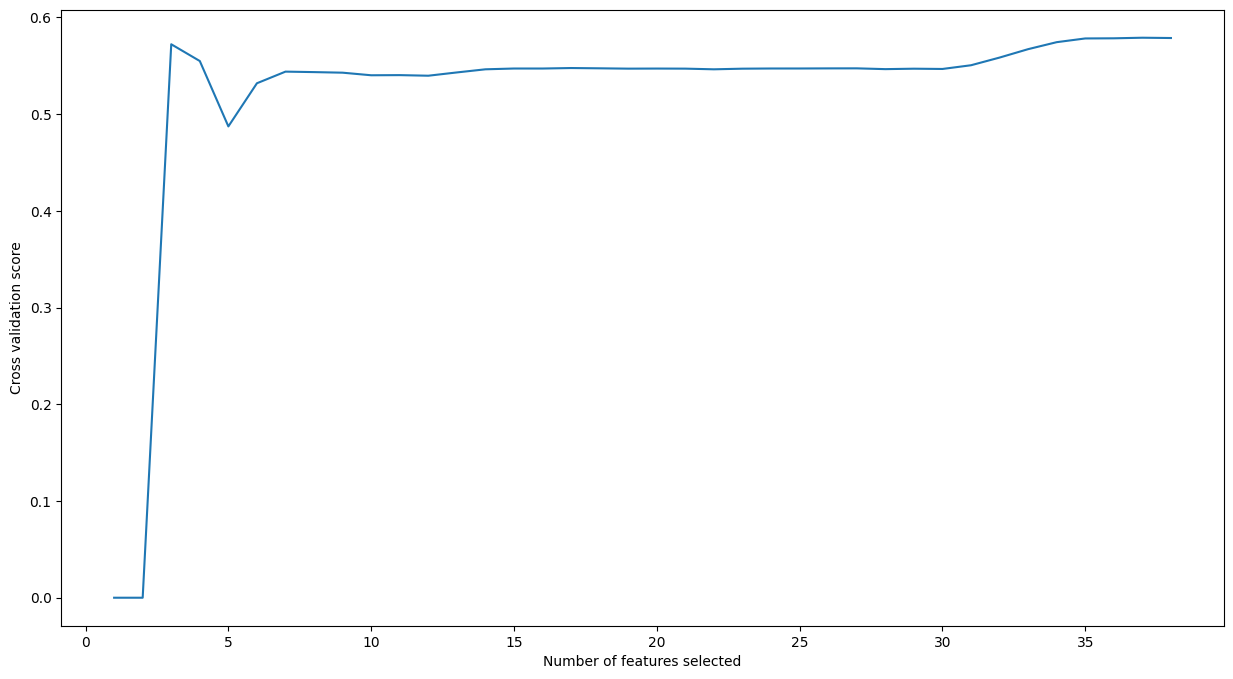

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
rfe = RFECV(estimator = lr,cv=cv,scoring='f1')
rfe.fit(X_train, y_train)
print("Optimal number of features : %d" % rfe.n_features_)
plt.figure(figsize=(15,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfe.cv_results_['mean_test_score']) + 1), rfe.cv_results_['mean_test_score'])
plt.show()

In [ ]:
for i in range(X_train.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=True, Rank: 1
Column: 1, Selected=True, Rank: 1
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=True, Rank: 1
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=False, Rank: 2
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=True, Rank: 1
Column: 10, Selected=True, Rank: 1
Column: 11, Selected=True, Rank: 1
Column: 12, Selected=True, Rank: 1
Column: 13, Selected=True, Rank: 1
Column: 14, Selected=True, Rank: 1
Column: 15, Selected=True, Rank: 1
Column: 16, Selected=True, Rank: 1
Column: 17, Selected=True, Rank: 1
Column: 18, Selected=True, Rank: 1
Column: 19, Selected=True, Rank: 1
Column: 20, Selected=True, Rank: 1
Column: 21, Selected=True, Rank: 1
Column: 22, Selected=True, Rank: 1
Column: 23, Selected=True, Rank: 1
Column: 24, Selected=True, Rank: 1
Column: 25, Selected=True, Rank: 1
Column: 26, Selected=True, Rank: 1
Column: 27, Selected=True, Rank: 1
Column: 28, Selected=True, Ra

#### We can see by selecting all the features we got highest Score. So We proceed with all the features

### Handling Imbalance Dataset by Using Different Techinques and select the best technique to handle our case
Techniques we are going to use are
1. Random OverSampling
2. SMOTE

In [ ]:
#Random OverSampling
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_over: ",X_over.shape)
print("Shape of y_over: ",y_over.shape)

Shape of X_train:  (4930, 38)
Shape of y_train:  (4930,)
Shape of X_over:  (7270, 38)
Shape of y_over:  (7270,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(random_state = 0)
dt = DecisionTreeClassifier(random_state = 0)
rf = RandomForestClassifier(random_state = 0)

model_lr_random = lr.fit(X_over,y_over)
model_dt_random = dt.fit(X_over,y_over)
model_rf_random = rf.fit(X_over,y_over)

pred_lr_random = model_lr_random.predict(X_test)
pred_dt_random = model_dt_random.predict(X_test)
pred_rf_random = model_rf_random.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
def print_metrics(true_labels,predicted_label_lr,predicted_label_dt,predicted_label_rf):
    print("Accuracy score of Logistic Regression: ",accuracy_score(true_labels,predicted_label_lr))
    print("Accuracy score of Decision Tree: ",accuracy_score(true_labels,predicted_label_dt))
    print("Accuracy score of Random Forest: ",accuracy_score(true_labels,predicted_label_rf))

    print("\n")

    print("Precision score of Logistic Regression: ",precision_score(true_labels,predicted_label_lr))
    print("Precision score of Decision Tree: ",precision_score(true_labels,predicted_label_dt))
    print("Precision score of Random Forest: ",precision_score(true_labels,predicted_label_rf))

    print("\n")

    print("Recall score of Logistic Regression: ",recall_score(true_labels,predicted_label_lr))
    print("Recall score of Decision Tree: ",recall_score(true_labels,predicted_label_dt))
    print("Recall score of Random Forest: ",recall_score(true_labels,predicted_label_rf))

In [ ]:
print_metrics(y_test,pred_lr_random,pred_dt_random,pred_rf_random)

Accuracy score of Logistic Regression:  0.7572172266919073
Accuracy score of Decision Tree:  0.7434926644581165
Accuracy score of Random Forest:  0.7785139611926172


Precision score of Logistic Regression:  0.5340022296544036
Precision score of Decision Tree:  0.5287769784172662
Precision score of Random Forest:  0.5956678700361011


Recall score of Logistic Regression:  0.8344947735191638
Recall score of Decision Tree:  0.5121951219512195
Recall score of Random Forest:  0.5749128919860628


In [ ]:
def print_classification_reports(true_labels,predicted_label_lr,predicted_label_dt,predicted_label_rf):
    print("Classification Report of Logistic Regression:")
    print("\n")
    print(classification_report(true_labels,predicted_label_lr))

    print("\n")

    print("Classification Report of Decision Tree:")
    print("\n")
    print(classification_report(true_labels,predicted_label_dt))

    print("\n")

    print("Classification Report of Random Forest:")
    print("\n")
    print(classification_report(true_labels,predicted_label_rf))

In [ ]:
print_classification_reports(y_test,pred_lr_random,pred_dt_random,pred_rf_random)

Classification Report of Logistic Regression:


              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1539
           1       0.53      0.83      0.65       574

    accuracy                           0.76      2113
   macro avg       0.73      0.78      0.73      2113
weighted avg       0.82      0.76      0.77      2113



Classification Report of Decision Tree:


              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1539
           1       0.53      0.51      0.52       574

    accuracy                           0.74      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.74      0.74      0.74      2113



Classification Report of Random Forest:


              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1539
           1       0.60      0.57      0.59       574

    accuracy                           0.78   

In [ ]:
#Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
model_lr_smote = lr.fit(X_train_smote,y_train_smote)
model_dt_smote = dt.fit(X_train_smote,y_train_smote)
model_rf_smote = rf.fit(X_train_smote,y_train_smote)

pred_lr_smote = model_lr_smote.predict(X_test)
pred_dt_smote = model_dt_smote.predict(X_test)
pred_rf_smote = model_rf_smote.predict(X_test)

In [ ]:
print_metrics(y_test,pred_lr_smote,pred_dt_smote,pred_rf_smote)

Accuracy score of Logistic Regression:  0.79649787032655
Accuracy score of Decision Tree:  0.709891150023663
Accuracy score of Random Forest:  0.7737813535257927


Precision score of Logistic Regression:  0.6188118811881188
Precision score of Decision Tree:  0.46869983948635635
Precision score of Random Forest:  0.5872727272727273


Recall score of Logistic Regression:  0.6533101045296167
Recall score of Decision Tree:  0.5087108013937283
Recall score of Random Forest:  0.5627177700348432


In [ ]:
print_classification_reports(y_test,pred_lr_smote,pred_dt_smote,pred_rf_smote)

Classification Report of Logistic Regression:


              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1539
           1       0.62      0.65      0.64       574

    accuracy                           0.80      2113
   macro avg       0.74      0.75      0.75      2113
weighted avg       0.80      0.80      0.80      2113



Classification Report of Decision Tree:


              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1539
           1       0.47      0.51      0.49       574

    accuracy                           0.71      2113
   macro avg       0.64      0.65      0.64      2113
weighted avg       0.72      0.71      0.71      2113



Classification Report of Random Forest:


              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1539
           1       0.59      0.56      0.57       574

    accuracy                           0.77   

Out of three models Logistic Regression, DecisionTree Classifier and RandomForest Classifier. Logistic Regression is performing well for our dataset with Random OverSampling

In [ ]:
#Gradient_Boosting_Classifier
from sklearn.ensemble import GradientBoostingClassifier

clf_GB = GradientBoostingClassifier(random_state=36)

model_GB = clf_GB.fit(X_over,y_over)

pred_GB= model_GB.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test,pred_GB))
print("Precision Score:", precision_score(y_test,pred_GB))
print("Recall Score:", recall_score(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

Accuracy Score: 0.7581637482252721
Precision Score: 0.5354330708661418
Recall Score: 0.8292682926829268
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1539
           1       0.54      0.83      0.65       574

    accuracy                           0.76      2113
   macro avg       0.73      0.78      0.73      2113
weighted avg       0.82      0.76      0.77      2113



In [ ]:
#Adaboost_Classifier
from sklearn.ensemble import AdaBoostClassifier

clf_AD = AdaBoostClassifier(random_state=36)

model_AD = clf_AD.fit(X_over,y_over)

pred_AD= model_AD.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test,pred_AD))
print("Precision Score:", precision_score(y_test,pred_AD))
print("Recall Score:", recall_score(y_test,pred_AD))
print(classification_report(y_test,pred_AD))

Accuracy Score: 0.7576904874585897
Precision Score: 0.5341409691629956
Recall Score: 0.8449477351916377
              precision    recall  f1-score   support

           0       0.93      0.73      0.81      1539
           1       0.53      0.84      0.65       574

    accuracy                           0.76      2113
   macro avg       0.73      0.79      0.73      2113
weighted avg       0.82      0.76      0.77      2113



### Performance Comparision

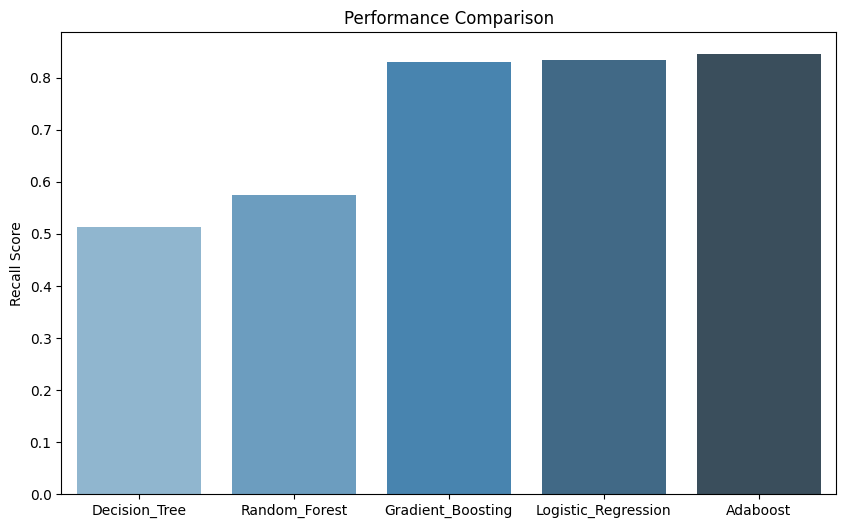

In [ ]:
names = ['Decision_Tree','Random_Forest','Gradient_Boosting','Logistic_Regression','Adaboost']
dt_re = recall_score(y_test,pred_dt_random)
rf_re = recall_score(y_test,pred_rf_random)
log_re = recall_score(y_test,pred_lr_random)
gb_re = recall_score(y_test,pred_GB)
ad_re =  recall_score(y_test,pred_AD)

recall_scores = [dt_re, rf_re, gb_re, log_re, ad_re]

plt.figure(figsize=(10, 6))
sns.barplot(x=names, y=recall_scores, palette="Blues_d")
plt.title('Performance Comparison')
plt.ylabel('Recall Score')
plt.show()